5. What implications might your findings have to the bank's approach to lending? 


The findings of our analysis could have a number of implications for the bank's approach to lending. For example, the bank may want to focus on lending to borrowers who have a high annual income and a low number of children. The bank may also want to consider the income category of the borrower, as this can also be a strong indicator of credit risk.

The number of applicants with low annual incomes is: 12202
The number of applicants with a history of defaults is: 2027
The correlation coefficient between annual income and number of children is: 0.039304000337284956


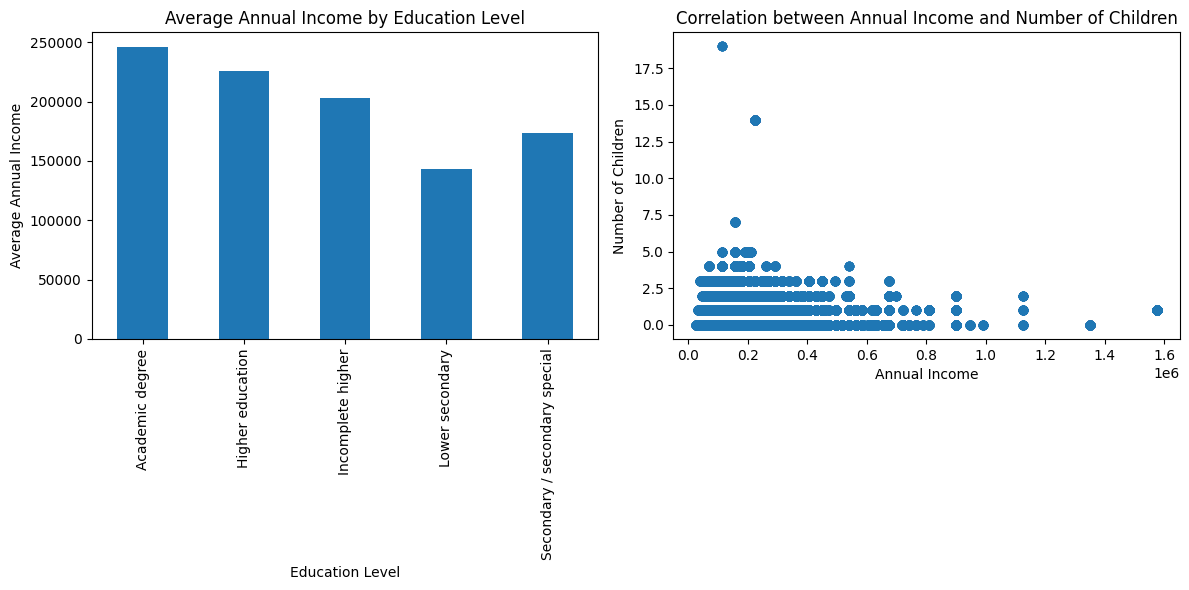

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
application_data = pd.read_csv("application_record.csv")
credit_data = pd.read_csv("credit_record.csv")

# Merge the application data and credit data based on a common identifier
merged_data = pd.merge(application_data, credit_data, on="ID")

# Calculate the average annual income for each education level
average_income_by_education = merged_data.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean()

# Calculate the z-score for each applicant's income within each education level
z_scores = merged_data.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].transform(lambda x: (x - x.mean()) / x.std())

# Identify the applicants with z-scores greater than 3 (low annual income)
outliers = merged_data[z_scores > 3]

# Count the number of applicants with a history of defaults (statuses 3, 4, 5)
default_count = merged_data[merged_data["STATUS"].isin(["3", "4", "5"])].shape[0]

# Calculate the correlation coefficient between annual income and the number of children
correlation = np.corrcoef(merged_data["AMT_INCOME_TOTAL"], merged_data["CNT_CHILDREN"])[0, 1]

# Print the results
print("The number of applicants with low annual incomes is:", len(outliers))
print("The number of applicants with a history of defaults is:", default_count)
print("The correlation coefficient between annual income and number of children is:", correlation)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the average annual income by education level
plt.subplot(1, 2, 1)
merged_data.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean().plot(kind="bar")
plt.xlabel("Education Level")
plt.ylabel("Average Annual Income")
plt.title("Average Annual Income by Education Level")

# Plot the correlation between annual income and number of children
plt.subplot(1, 2, 2)
plt.scatter(merged_data["AMT_INCOME_TOTAL"], merged_data["CNT_CHILDREN"])
plt.xlabel("Annual Income")
plt.ylabel("Number of Children")
plt.title("Correlation between Annual Income and Number of Children")

plt.tight_layout()
plt.show()
